# **Title: Water Consumption Prediction using Machine Learning**

## **Introduction:** 
### *> Water is a vital resource, and its efficient management has become a global challenge due to population growth and urbanization.*
### *> Predicting water consumption can help in ensuring proper distribution, detecting leaks, and prompting sustainability.*

## **Objective:**
### *> The aim of this project is to develop a machine learning model that can accurately predict water consumption by analyzing household, environmental and socio-economic factors.These predictions can help communities plan better, avoid wastage and encourage everyone to use water more responsibly for a sustainable future.*


## **Importing Required Libraries**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## **Reading the dataset**

In [3]:
df=pd.read_csv('train.csv')

## **Understanding the dataset**

### *> To get first 2 columns*

In [4]:
df.head(2)

,Timestamp,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage,Water_Consumption
0,01/01/2002 00,1,Studio,15.31,46.61,1.06,0.97,Low,0,Swimming Pool,0.0,64.85
1,01/01/2002 08,4,NaN,21.01,66.11,2.98,0.91,Upper Middle,1,Swimming Pool,1.0,192.50


### *> To get last 2 columns*

In [5]:
df.tail(2)

,Timestamp,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage,Water_Consumption
13998,11/10/2014 00,4,3BHK,11.62,64.48,2.86,1.120000,Upper Middle,1,Swimming Pool,0.0,212.19
13999,11/10/2014 08,4,2BHK,23.78,44.88,1.26,2.133695,c&8%1,1,Jacuzzi,0.0,303.59


### *> To get number of rows and columns of the data*

In [6]:
df.shape

(14000, 12)

### *> To get statistical values of the data*

In [7]:
df.describe()

,Residents,Temperature,Water_Price,Period_Consumption_Index,Guests,Appliance_Usage,Water_Consumption
count,14000.000000,13559.000000,14000.000000,14000.000000,14000.000000,13585.000000,14000.000000
mean,2.078429,22.566559,0.657924,1.152890,0.292929,0.201987,164.461230
std,9.241665,7.216447,8.765776,0.229047,0.489164,0.401498,72.873894
min,-99.000000,10.000000,-99.000000,-0.130782,-2.000000,0.000000,35.540000
25%,2.000000,16.340000,1.320000,0.970000,0.000000,0.000000,109.550000
50%,3.000000,22.580000,1.630000,1.150000,0.000000,0.000000,150.375000
75%,4.000000,28.850000,2.112500,1.330000,1.000000,0.000000,206.765000
max,5.000000,35.000000,3.000000,2.352311,3.000000,1.000000,531.490000


### *> To get columns of the data*

In [8]:
df.columns

Index(['Timestamp', 'Residents', 'Apartment_Type', 'Temperature', 'Humidity',
       'Water_Price', 'Period_Consumption_Index', 'Income_Level', 'Guests',
       'Amenities', 'Appliance_Usage', 'Water_Consumption'],
      dtype='object')

### *> To get overall information about the data*

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timestamp                 14000 non-null  object 
 1   Residents                 14000 non-null  int64  
 2   Apartment_Type            13574 non-null  object 
 3   Temperature               13559 non-null  float64
 4   Humidity                  14000 non-null  object 
 5   Water_Price               14000 non-null  float64
 6   Period_Consumption_Index  14000 non-null  float64
 7   Income_Level              13574 non-null  object 
 8   Guests                    14000 non-null  int64  
 9   Amenities                 8003 non-null   object 
 10  Appliance_Usage           13585 non-null  float64
 11  Water_Consumption         14000 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 1.3+ MB


### *> To get index*

In [10]:
df.index

RangeIndex(start=0, stop=14000, step=1)

### *> To get data-types of every column in the data*

In [11]:
df.dtypes

Timestamp                    object
Residents                     int64
Apartment_Type               object
Temperature                 float64
Humidity                     object
Water_Price                 float64
Period_Consumption_Index    float64
Income_Level                 object
Guests                        int64
Amenities                    object
Appliance_Usage             float64
Water_Consumption           float64
dtype: object

## **Cleaning the data**

### *> To get total number of duplicate values in the data*

In [12]:
df.duplicated().sum()

np.int64(0)

### *> To drop duplicate values in the data*

In [13]:
df.drop_duplicates()

,Timestamp,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage,Water_Consumption
0,01/01/2002 00,1,Studio,15.31,46.61,1.06,0.970000,Low,0,Swimming Pool,0.0,64.85
1,01/01/2002 08,4,NaN,21.01,66.11,2.98,0.910000,Upper Middle,1,Swimming Pool,1.0,192.50
2,01/01/2002 16,2,Cottage,12.86,60.86,1.44,1.430000,Middle,0,NaN,1.0,116.62
3,02/01/2002 00,2,1BHK,20.16,50.58,1.48,0.910000,Middle,-1,Garden,0.0,76.96
4,02/01/2002 08,2,Cottage,16.23,52.25,1.14,1.110000,Middle,0,Fountain,0.0,104.70
...,...,...,...,...,...,...,...,...,...,...,...,...
13995,10/10/2014 00,2,1BHK,25.61,61.5,1.70,0.940000,Low,0,NaN,0.0,78.59
13996,10/10/2014 08,5,2BHK,13.27,52.58,1.88,1.030000,Upper Middle,0,Garden,1.0,185.50
13997,10/10/2014 16,4,2BHK,NaN,46.93,1.22,1.100000,Middle,0,NaN,1.0,180.28
13998,11/10/2014 00,4,3BHK,11.62,64.48,2.86,1.120000,Upper Middle,1,Swimming Pool,0.0,212.19


### *> To get total number of null values in the data*

In [14]:
df.isnull().sum()

Timestamp                      0
Residents                      0
Apartment_Type               426
Temperature                  441
Humidity                       0
Water_Price                    0
Period_Consumption_Index       0
Income_Level                 426
Guests                         0
Amenities                   5997
Appliance_Usage              415
Water_Consumption              0
dtype: int64

### *> To get total number of null values in the data After filling null values*

In [15]:
df.isnull().sum()

Timestamp                      0
Residents                      0
Apartment_Type               426
Temperature                  441
Humidity                       0
Water_Price                    0
Period_Consumption_Index       0
Income_Level                 426
Guests                         0
Amenities                   5997
Appliance_Usage              415
Water_Consumption              0
dtype: int64

### *> To plot boxplot in order to check outliers*

(array([1, 2, 3, 4, 5, 6, 7]),
 [Text(1, 0, 'Residents'),
  Text(2, 0, 'Temperature'),
  Text(3, 0, 'Water_Price'),
  Text(4, 0, 'Period_Consumption_Index'),
  Text(5, 0, 'Guests'),
  Text(6, 0, 'Appliance_Usage'),
  Text(7, 0, 'Water_Consumption')])

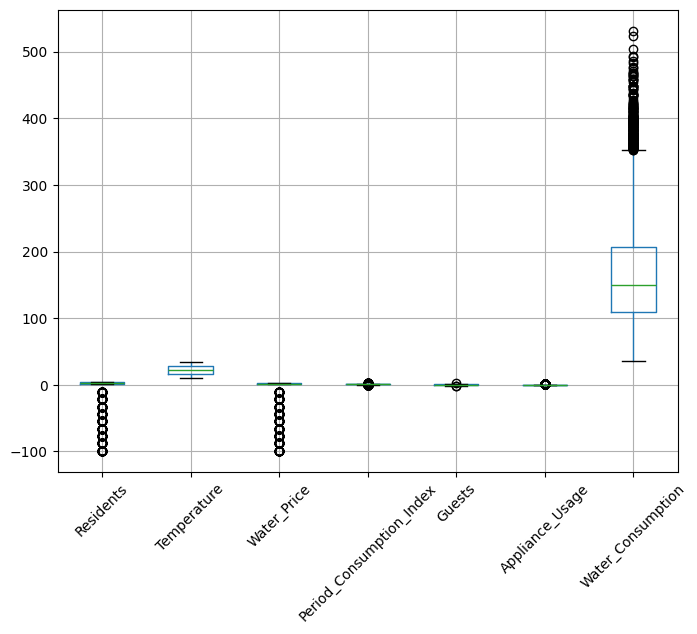

In [16]:
num_cols=df.select_dtypes(include=['int64','float64']).columns
plt.figure(figsize=(8,6))
df[num_cols].boxplot()
plt.xticks(rotation=45)

### *> To set quantiles of lower boundaries and upper boundaries*

In [17]:
lb=df['Residents'].quantile(0.25)
up=df['Residents'].quantile(0.75)
lb2=df['Water_Price'].quantile(0.25)
up2=df['Water_Price'].quantile(0.75)
lb3=df['Guests'].quantile(0.25)
up3=df['Guests'].quantile(0.75)
lb4=df['Appliance_Usage'].quantile(0.25)
up4=df['Appliance_Usage'].quantile(0.75)
lb5=df['Water_Consumption'].quantile(0.25)
up5=df['Water_Consumption'].quantile(0.75)
lb6=df['Period_Consumption_Index'].quantile(0.25)
up6=df['Period_Consumption_Index'].quantile(0.75)

### *> To remove outliers*

In [18]:
df=df[
    (df['Residents']>=lb) & (df['Residents']<=up) &
    (df['Water_Price']>=lb2) & (df['Water_Price']<=up2)
]
df=df[
    (df['Guests']>=lb3) & (df['Guests']<=up3) &
    (df['Appliance_Usage']>=lb4) & (df['Appliance_Usage']<=up4) &
    (df['Water_Consumption']>=lb5) & (df['Water_Consumption']<=up5)
]
df=df[
    (df['Period_Consumption_Index']>=lb6) & (df['Period_Consumption_Index']<=up6) 
]

### *> To plot boxplot after removing outliers*

(array([1, 2, 3, 4, 5, 6, 7]),
 [Text(1, 0, 'Residents'),
  Text(2, 0, 'Temperature'),
  Text(3, 0, 'Water_Price'),
  Text(4, 0, 'Period_Consumption_Index'),
  Text(5, 0, 'Guests'),
  Text(6, 0, 'Appliance_Usage'),
  Text(7, 0, 'Water_Consumption')])

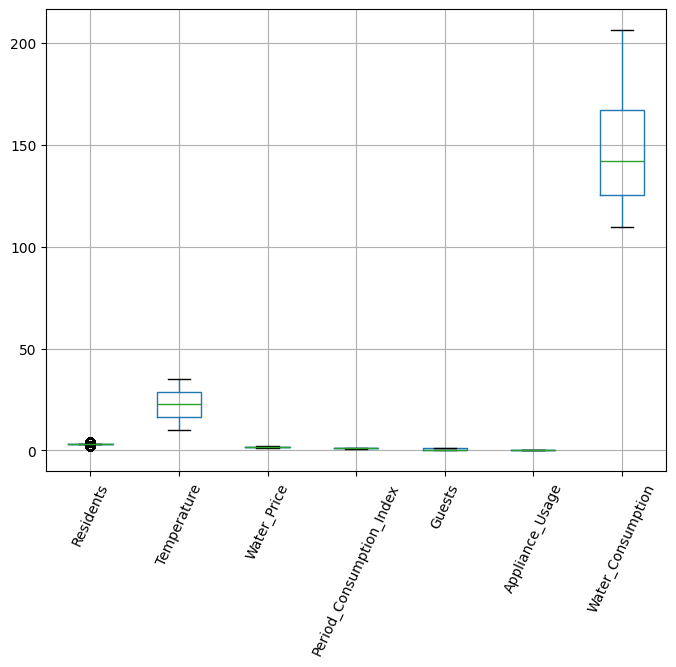

In [19]:
plt.figure(figsize=(8,6))
df[num_cols].boxplot()
plt.xticks(rotation=65)

## **Exploratory Data Analysis**

In [20]:
df['Timestamp']=pd.to_datetime(df['Timestamp'],format="mixed",dayfirst=True)

mean_humidity = pd.to_numeric(df['Humidity'], errors='coerce').mean()
df['Humidity'] = df['Humidity'].apply(lambda x: mean_humidity if re.search('[a-zA-Z<>()@=/?#$%&*!%]', str(x)) else x)
df['Humidity'] = df['Humidity'].astype(float)

residents_mode=df['Residents'].mode()[0]
df['Residents'] = df['Residents'].apply(lambda y: residents_mode if re.search('[-]', str(y)) else y)

df['Apartment_Type'].isnull().sum()
df['Apartment_Type'].fillna(df['Apartment_Type'].mode()[0],inplace=True)

df['Temperature'].isnull().sum()
df['Temperature'].fillna(df['Temperature'].mean(),inplace=True)

income_mode=df['Income_Level'].mode()[0]
df['Income_Level']=df['Income_Level'].apply(lambda x: income_mode if re.search('^[a-zA-Z0-9[:punct:]]{4,5}$',str(x)) else x)
df['Income_Level'].fillna(income_mode,inplace=True)

df['Amenities'].fillna(df['Amenities'].mode()[0],inplace=True)

df['Appliance_Usage'].fillna(df['Appliance_Usage'].mode()[0],inplace=True)

guest_mode=df['Guests'].mode()[0]
df['Guests']=df['Guests'].apply(lambda z : guest_mode if re.search('-',str(z)) else z)

In [45]:
df.isnull().sum()

Timestamp                   0
Residents                   0
Apartment_Type              0
Temperature                 0
Humidity                    0
Water_Price                 0
Period_Consumption_Index    0
Income_Level                0
Guests                      0
Amenities                   0
Appliance_Usage             0
Water_Consumption           0
Timestamp_year              0
Timestamp_month             0
Timestamp_day               0
Timestamp_dayofweek         0
dtype: int64

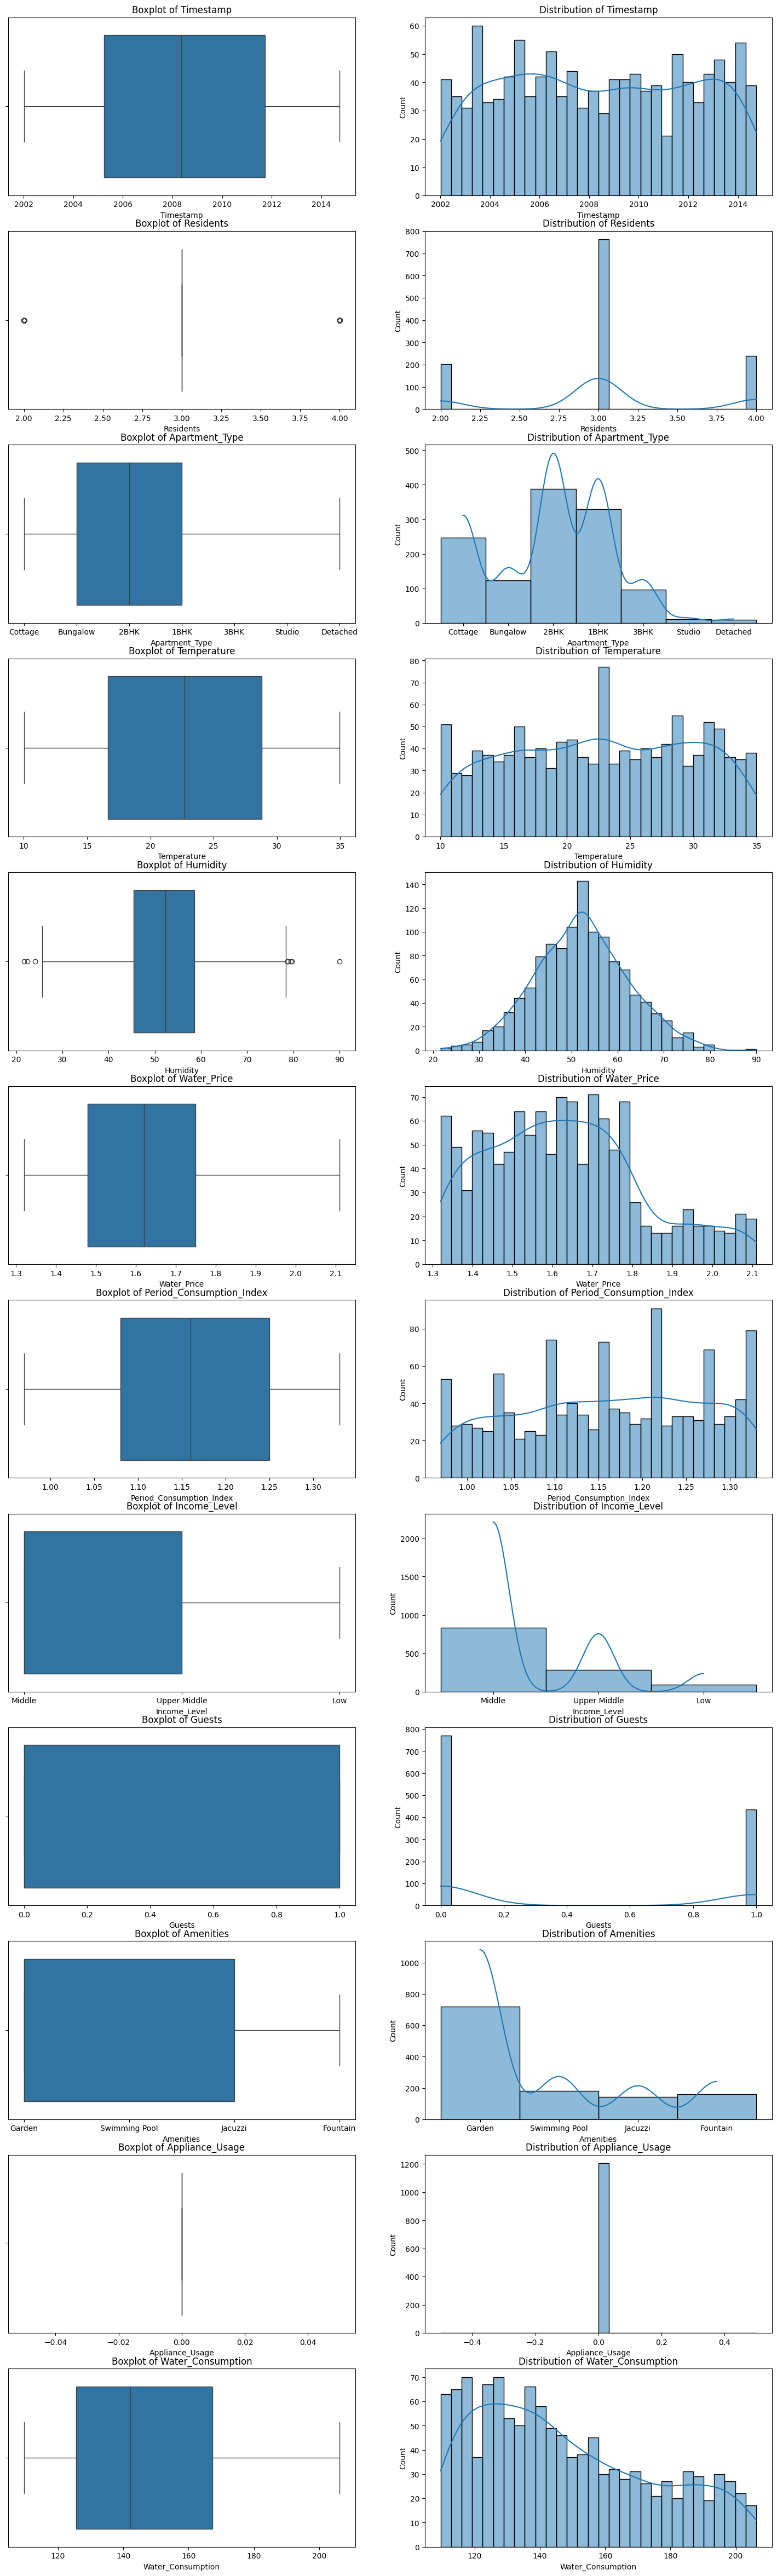

In [21]:
columns=df.columns
fig, axes = plt.subplots(len(columns), 2, figsize=(18, len(columns)*5))
for i, col in enumerate(columns):
    sns.boxplot(x=df[col], ax=axes[i,0], data=df)
    axes[i,0].set_title(f"Boxplot of {col}")
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i,1])
    axes[i,1].set_title(f"Distribution of {col}")
plt.show()

In [22]:
# Removing outliers (capping extreme values)
df["Residents"] = df["Residents"].clip(lower=0, upper=5)
df["Guests"] = df["Guests"].clip(lower=0, upper=2)
df["Water_Price"] = df["Water_Price"].clip(lower=1.0)
df['Period_Consumption_Index']=df['Period_Consumption_Index'].clip(lower=0.5,upper=1.8)
df['Humidity']=df['Humidity'].clip(lower=28,upper=75)
df['Water_Consumption']=df['Water_Consumption'].clip(lower=1.0,upper=350)
df['Appliance_Usage']=df['Appliance_Usage'].clip(upper=0.002)

# Model Building 

Feature Engineering

In [23]:
datetime_cols = df.select_dtypes(include=['datetime64']).columns
for col in datetime_cols:
    df[f'{col}_year'] = df[col].dt.year
    df[f'{col}_month'] = df[col].dt.month
    df[f'{col}_day'] = df[col].dt.day
    df[f'{col}_dayofweek'] = df[col].dt.dayofweek

Encoding

In [24]:
from sklearn.preprocessing import LabelEncoder
cat_features=df.select_dtypes(exclude=['int64','float64','int32']).columns
encoder=LabelEncoder()
for col in cat_features:
    df[col]=encoder.fit_transform(df[col])

Train Test Split

In [25]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Timestamp','Water_Consumption'])
y = df['Water_Consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [26]:
X_train

,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage,Timestamp_year,Timestamp_month,Timestamp_day,Timestamp_dayofweek
6111,3,0,30.82,63.32,1.70,1.24,1,1,1,0.0,2007,7,31,1
3732,4,2,12.63,44.41,1.97,1.13,2,1,1,0.0,2005,5,29,6
10327,3,0,26.15,35.84,1.73,1.15,1,1,1,0.0,2011,6,5,6
1595,3,4,32.12,47.81,1.41,1.19,1,0,0,0.0,2003,6,16,0
4677,3,0,12.57,47.62,1.38,1.19,1,0,1,0.0,2006,4,9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12330,3,1,23.59,61.28,1.45,1.20,1,0,1,0.0,2013,4,3,2
12887,2,4,12.82,57.53,1.78,1.30,1,0,2,0.0,2013,10,5,5
13213,4,1,25.23,36.47,1.52,1.00,1,1,1,0.0,2014,1,22,2
10273,3,1,28.98,51.71,1.74,1.33,2,1,1,0.0,2011,5,18,2


Transforming

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

num_features=X_train.select_dtypes(include=['int64','float64','int32']).columns
preprocessor=ColumnTransformer(
    transformers=[
        ('num',MinMaxScaler(),num_features),
                ],
                remainder='passthrough'
)

X_train_transform=preprocessor.fit_transform(X_train)
X_test_transform=preprocessor.transform(X_test)

Importing Libraries

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

Models

In [29]:
models = {
    'linear Regression':LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(),
    'Light Gbm': LGBMRegressor()
}

results = {}
for name, model in models.items():
    pipeline = Pipeline([
        
        ('regressor', model)
    ])
    
    pipeline.fit(X_train_transform, y_train)
    
    y_pred = pipeline.predict(X_test_transform)
    
    results[name] = {
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred),
        'model': pipeline
    }

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000377 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 707
[LightGBM] [Info] Number of data points in the train set: 1083, number of used features: 13
[LightGBM] [Info] Start training from score 147.505355


results


Model Performance Comparison:
                        RMSE        MAE        R2
linear Regression  17.733816  13.551522  0.582448
Random Forest      16.165054  12.015562  0.653055
XGBoost            11.484792   8.396456  0.824873
Decision Tree      21.847699  15.461736  0.366250
Light Gbm          11.117208   8.232999  0.835904


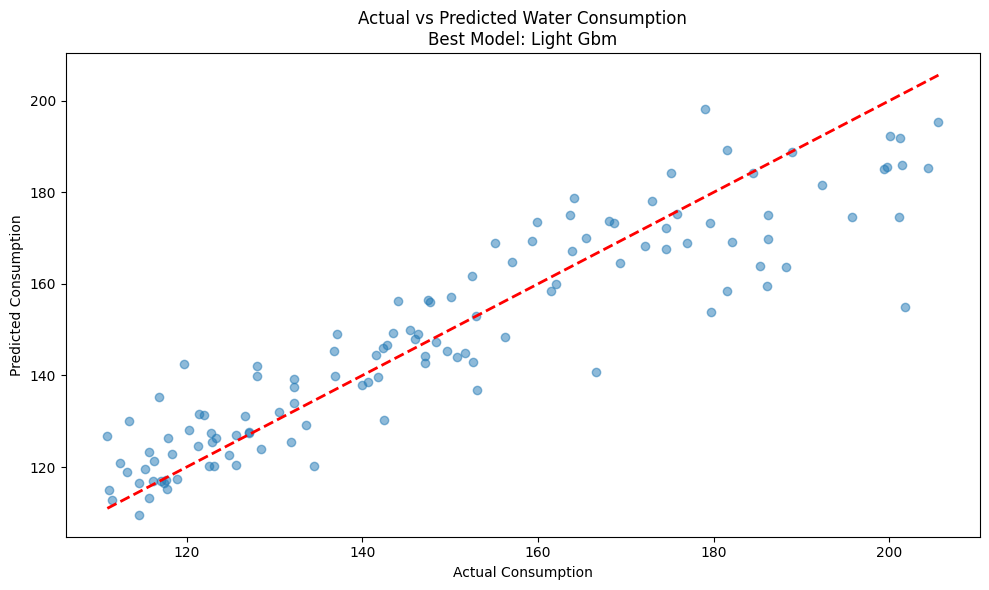

In [30]:
import matplotlib.pyplot as plt

# Print results
results_df = pd.DataFrame({name: {
    'RMSE': res['RMSE'],
    'MAE': res['MAE'],
    'R2': res['R2']
} for name, res in results.items()}).T

print("\nModel Performance Comparison:")
print(results_df)

# Find best model
best_model_name = results_df['R2'].idxmax()
best_model = results[best_model_name]['model']

# Plot actual vs predicted for best model
plt.figure(figsize=(10, 6))
y_pred_best = best_model.predict(X_test_transform)
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Consumption')
plt.ylabel('Predicted Consumption')
plt.title(f'Actual vs Predicted Water Consumption\nBest Model: {best_model_name}')
plt.tight_layout()
plt.show()

Hyper Tuning

In [31]:
from sklearn.model_selection import GridSearchCV

lgb_model=LGBMRegressor()
lgb_model.fit(X_train_transform,y_train)

param_grid={

    'learning_rate':[ 0.1],
    'max_depth': [5],
    'min_child_samples': [5],
    'n_estimators': [300],
    'num_leaves': [31],
    'reg_alpha': [0.1],
    'subsample': [0.8]
}


grid_search = GridSearchCV(
    estimator=lgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=9
)
grid_search.fit(X_train_transform,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 707
[LightGBM] [Info] Number of data points in the train set: 1083, number of used features: 13
[LightGBM] [Info] Start training from score 147.505355
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000246 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 707
[LightGBM] [Info] Number of data points in the train set: 1083, number of used features: 13
[LightGBM] [Info] Start training from score 147.505355
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

,estimator,LGBMRegressor()
,param_grid,"{'learning_rate': [0.1], 'max_depth': [5], 'min_child_samples': [5], 'n_estimators': [300], ...}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,9
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,boosting_type,'gbdt'


In [32]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_samples': 5,
 'n_estimators': 300,
 'num_leaves': 31,
 'reg_alpha': 0.1,
 'subsample': 0.8}

In [33]:
lgb_model=grid_search.best_estimator_
pred=lgb_model.predict(X_test_transform)
rmse = np.sqrt(mean_absolute_error(y_test, pred))
r2 = r2_score(y_test, pred)

print("\nFinal Model Performance:")
print(f"MAE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")


Final Model Performance:
MAE: 2.6986
R2 Score: 0.8688


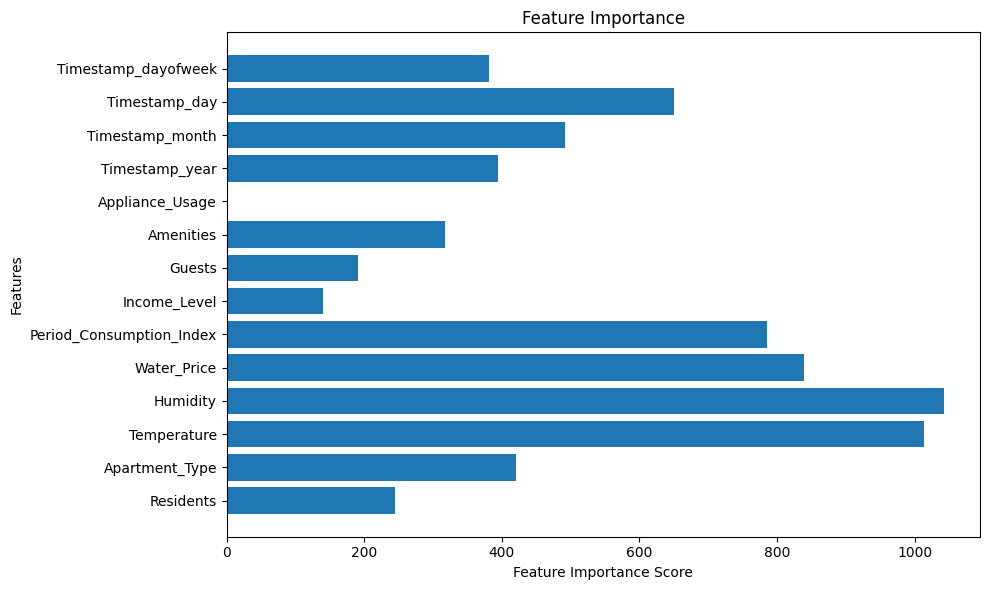

In [34]:
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns,lgb_model.feature_importances_)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

Predicition

In [35]:
test=pd.read_csv('test.csv')
test

,Timestamp,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage
0,11/10/2014 16,5,Bungalow,11.89,57.88,2.77,1.480000,Upper Middle,1,Jacuzzi,0.0
1,12/10/2014 00,4,Bungalow,29.22,61.41,2.85,1.300000,Upper Middle,0,Garden,NaN
2,12/10/2014 08,3,Cottage,10.27,64.9,1.66,0.970000,Middle,0,NaN,0.0
3,12/10/2014 16,3,1BHK,27.03,52.67,1.48,1.310000,Low,0,NaN,0.0
4,13/10/2014 00,2,Cottage,12.32,55.23,1.19,1.300000,Middle,0,Swimming Pool,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5995,01/04/2020 00,5,2BHK,16.22,54.79,1.09,1.430000,Middle,0,NaN,1.0
5996,01/04/2020 08,3,1BHK,15.65,52.18,1.61,0.900000,Low,0,Garden,0.0
5997,01/04/2020 16,3,Bungalow,16.97,33.14,2.62,1.490000,Rich,0,Fountain,0.0
5998,02/04/2020 00,4,2BHK,19.86,36.94,1.42,1.882674,Middle,0,NaN,0.0


In [36]:
test.dtypes

Timestamp                    object
Residents                     int64
Apartment_Type               object
Temperature                 float64
Humidity                     object
Water_Price                 float64
Period_Consumption_Index    float64
Income_Level                 object
Guests                        int64
Amenities                    object
Appliance_Usage             float64
dtype: object

In [37]:
test.isnull().sum()

Timestamp                      0
Residents                      0
Apartment_Type               166
Temperature                  150
Humidity                       0
Water_Price                    0
Period_Consumption_Index       0
Income_Level                 165
Guests                         0
Amenities                   2513
Appliance_Usage              177
dtype: int64

In [38]:
# Preprocessing
test['Apartment_Type'].fillna(test['Apartment_Type'].mode()[0],inplace=True)
test['Temperature'].fillna(test['Temperature'].mean(),inplace=True)
test['Amenities'].fillna(test['Amenities'].mode()[0],inplace=True)
test['Appliance_Usage'].fillna(test['Appliance_Usage'].mean(),inplace=True)
mode=test['Income_Level'].mode()[0]
test['Income_Level']=test['Income_Level'].apply(lambda x: mode if re.search('^[a-zA-Z0-9[:punct:]]{4,5}$',str(x)) else x)
test['Income_Level'].fillna(mode,inplace=True)
test["Humidity"] = test["Humidity"].astype(str).apply(lambda x: x if re.match(r"^\d+(\.\d+)?$", x) else None)
test['Humidity'] = pd.to_numeric(test['Humidity'], errors='coerce')
test['Humidity'].fillna(test['Humidity'].mean(),inplace=True)

In [39]:
test['Timestamp']=pd.to_datetime(test['Timestamp'],format="mixed",dayfirst=True)
datetime_cols1 = test.select_dtypes(include=['datetime64']).columns
for col in datetime_cols1:
    test[f'{col}_year'] = test[col].dt.year
    test[f'{col}_month'] = test[col].dt.month
    test[f'{col}_day'] = test[col].dt.day
    test[f'{col}_dayofweek'] = test[col].dt.dayofweek

In [40]:
from sklearn.preprocessing import LabelEncoder
cat_features_test=test.select_dtypes(exclude=['int64','float64','int32','datetime64[ns]']).columns
encoder=LabelEncoder()
for col in cat_features_test:
    test[col]=encoder.fit_transform(test[col])

test_data=preprocessor.transform(test)

In [41]:
new_df=pd.DataFrame()
new_df['Timestamp']=test['Timestamp'].values
new_df['Water_Consumption']=lgb_model.predict(test_data)

In [42]:
new_df['Timestamp'] = pd.to_datetime(new_df['Timestamp']).dt.strftime('%d/%m/%Y %H')
new_df.head()

,Timestamp,Water_Consumption
0,11/10/2014 16,191.083257
1,12/10/2014 00,173.288519
2,12/10/2014 08,94.045348
3,12/10/2014 16,131.084987
4,13/10/2014 00,123.490131


In [43]:
new_df.to_csv("Final_prediction.csv",index=False)

In [44]:
import joblib
# Save the trained model
joblib.dump(lgb_model, 'model.joblib')

print("Model trained and saved as 'model.joblib'")

Model trained and saved as 'model.joblib'
